Scores de Validação Cruzada: [-2.29894503  0.91961593 -0.2858912   0.87651997  0.77751174  0.95211783
  0.0780524  -2.04763799]
Melhores parâmetros: {'C': 10, 'epsilon': 0.1, 'kernel': 'rbf'}
Erro Absoluto Médio TESTE: 0.06381797639802274
Erro Absoluto Médio TREINO: 0.05324370854166377


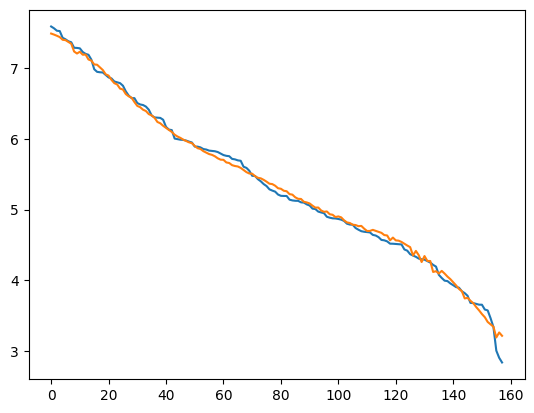

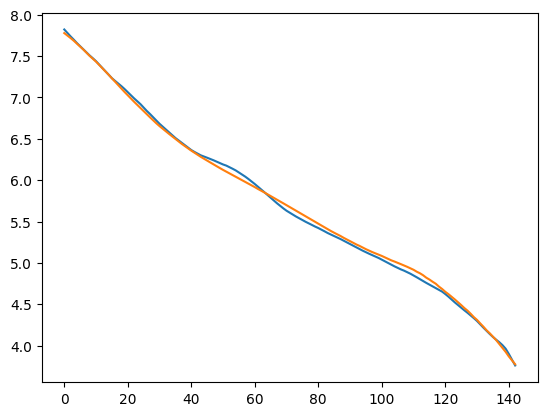

In [6]:
import pandas as pd
from joblib import dump
from sklearn.calibration import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import SVR  # Importando o SVR
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Carregar o dataset
df = pd.read_csv('2015.csv')

# Remover colunas desnecessárias
Y = df['Happiness Score']
X = df.drop(['Country', 'Happiness Score'], axis=1)

lb = LabelEncoder();
X['Region'] = lb.fit_transform(X['Region'])

# Validando o modelo com cross-validation
scores = cross_val_score(SVR(), X, Y, cv=8)  # Usando SVR
print("Scores de Validação Cruzada:", scores)

# PCA para redução de dimensionalidade
pca = PCA(n_components=8)
pca.fit(X)
X = pca.transform(X)

# Divisão em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

# Ajustando o GridSearchCV para o modelo SVR
model = GridSearchCV(
    SVR(),
    {
        'kernel': ['linear', 'rbf', 'poly'],  # Testando diferentes kernels
        'C': [1, 10, 100],  # Ajustando o parâmetro C (penalização)
        'epsilon': [0.1, 0.2, 0.3]  # Ajustando o parâmetro epsilon
    },
    n_jobs=4
)

# Treinando o modelo
model.fit(X_train, Y_train)
print("Melhores parâmetros:", model.best_params_)
model = model.best_estimator_

# Salvando o modelo treinado
dump(model, 'model.pkl')

# Calculando o erro absoluto médio
print("Erro Absoluto Médio TESTE:", mean_absolute_error(Y_test, model.predict(X_test)))
print("Erro Absoluto Médio TREINO:", mean_absolute_error(Y_train, model.predict(X_train)))

# Previsões
Ypred = model.predict(X)

# Plotando os resultados reais vs previsões
plt.plot(Y)
plt.plot(Ypred)
plt.show()

# Calculando a média móvel para suavizar as previsões e os valores reais
wR = []
wP = []
Ymm = []
Ypmm = []
for i in range(len(Y)):
    wR.append(Y[i])
    wP.append(Ypred[i])
    if len(wR) > 15:
        Ymm.append(sum(wR) / 15)
        Ypmm.append(sum(wP) / 15)
        wR.pop(0)
        wP.pop(0)

# Plotando as médias móveis
plt.plot(Ymm)
plt.plot(Ypmm)
plt.show()
